# Problem2

$$
\\it's\;been\;decided\;to\;tune\;on\;[0, \pi]\;and\;miror\;the\;next\;part\;to\;make\;symmetry
$$

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [2]:
from scipy.optimize import differential_evolution, NonlinearConstraint, Bounds, minimize, fmin, rosen 

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html#scipy.optimize.differential_evolution

In [4]:
# Generate universe variables
x_in = np.arange(0, np.pi, 0.01)
y_out = np.arange(0, 1, 0.01)


#well this function takes a vector/list of variables for mf boundies with input & spits out a number for sin()
def sin(X, x):
    x_lo = fuzz.trapmf(x_in, [X[0], X[1], X[2], X[3]])
    x_md = fuzz.trapmf(x_in, [X[4], X[5], X[6], X[7]])
    x_hi = fuzz.trapmf(x_in, [X[8], X[9], X[10], X[11]])
   
    y_lo = fuzz.trapmf(y_out, [X[12], X[13], X[14], X[15]])
    y_hi = fuzz.trapmf(y_out, [X[16], X[17], X[18], X[19]])
    
    x_le_lo = fuzz.interp_membership(x_in, x_lo, x)
    x_le_md = fuzz.interp_membership(x_in, x_md, x)
    x_le_hi = fuzz.interp_membership(x_in, x_hi, x)

    #rule1: if x == lo -> y = lo
    y_act_lo1 = np.fmax(np.fmin(x_le_lo, y_lo), 1-x_le_lo)
    
    #rule2: if x == md -> y = hi
    y_act_hi = np.fmax(np.fmin(x_le_md, y_hi), 1-x_le_md)
    
    #rule3: if x == hi -> y = lo
    y_act_lo2 = np.fmax(np.fmin(x_le_hi, y_lo), 1-x_le_hi)
    
    y_act_lo = np.fmax(y_act_lo1, y_act_lo2)
    
    agg = np.fmin(y_act_lo, y_act_hi)
    
    if agg.sum() == 0:

        return 1/2

    y = fuzz.defuzz(y_out, agg, 'centroid')
    
    return y
# # Generate fuzzy membership functions
# x_lo = fuzz.trapmf(x_in, [0, 0, 0.1, 2])
# x_md = fuzz.trapmf(x_in, [1, np.pi/2, np.pi/2, 3])
# x_hi = fuzz.trapmf(x_in, [2, 2, 3, np.pi])


In [5]:
sin([0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.8, 2, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.6, 0.8, 1, 1], 2)

0.6824387596899225

In [6]:
np.sin(2)

0.9092974268256817

In [7]:
def Error1(X):
    p4 = np.pi/4
    v = np.array([np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4)])
    return np.linalg.norm(v, 2)

In [8]:
Error1([0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.9, 2.1, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.7, 0.8, 1, 1])

0.35226711669392463

In [21]:

#constrains & Bounds
bounds = [(0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi),
          (0, np.pi), (0, np.pi), (0, np.pi), (0, np.pi), 
         (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]

def c_x_lo_1(x):
    return np.array(x[1]-x[0])
c1 = NonlinearConstraint(c_x_lo_1, 1e-5, np.inf)
def c_x_lo_2(x):
    return np.array(x[2]-x[1])
c2 = NonlinearConstraint(c_x_lo_2, 1e-5, np.inf)
def c_x_lo_3(x):
    return np.array(x[3]-x[2])
c3 = NonlinearConstraint(c_x_lo_3, 1e-5, np.inf)
def c_x_md_1(x):
    return np.array(x[5]-x[4])
c4 = NonlinearConstraint(c_x_md_1, 1e-5, np.inf)
def c_x_md_2(x):
    return np.array(x[6]-x[5])
c5 = NonlinearConstraint(c_x_md_2, 1e-5, np.inf)
def c_x_md_3(x):
    return np.array(x[7]-x[6])
c6 = NonlinearConstraint(c_x_md_3, 1e-5, np.inf)
def c_x_hi_1(x):
    return np.array(x[9]-x[8])
c7 = NonlinearConstraint(c_x_hi_1, 1e-5, np.inf)
def c_x_hi_2(x):
    return np.array(x[10]-x[9])
c8 = NonlinearConstraint(c_x_hi_2, 1e-5, np.inf)
def c_x_hi_3(x):
    return np.array(x[11]-x[10])
c9 = NonlinearConstraint(c_x_hi_3, 1e-5, np.inf)
def c_y_lo_1(x):
    return np.array(x[13]-x[12])
c10 = NonlinearConstraint(c_y_lo_1, 1e-5, np.inf)
def c_y_lo_2(x):
    return np.array(x[14]-x[13])
c11 = NonlinearConstraint(c_y_lo_2, 1e-5, np.inf)
def c_y_lo_3(x):
    return np.array(x[15]-x[14])
c12 = NonlinearConstraint(c_y_lo_3, 1e-5, np.inf)
def c_y_hi_1(x):
    return np.array(x[17]-x[16])
c13 = NonlinearConstraint(c_y_hi_1, 1e-5, np.inf)
def c_y_hi_2(x):
    return np.array(x[18]-x[17])
c14 = NonlinearConstraint(c_y_hi_2, 1e-5, np.inf)
def c_y_hi_3(x):
    return np.array(x[19]-x[18])
c15 = NonlinearConstraint(c_y_hi_3, 1e-5, np.inf)

cs = (c1, c2, c3, c4, c5, c6, c7, c8, c9, c10, c11, c12, c13, c14, c15)

In [22]:

xinitial = [0, 0, 0.1, 1.5, 1, 1.6, 1.8, 3, 1.8, 2, np.pi, np.pi, 0, 0, 0.2, 0.6, 0.6, 0.8, 1, 1]
result1 = differential_evolution(Error1, bounds, constraints=cs, x0 = xinitial)
result1.x, result1.fun

(array([0.36294261, 0.77577823, 1.40455322, 2.2749305 , 0.50278383,
        1.37374483, 2.33382995, 2.75289712, 0.38092552, 0.78000001,
        1.62102939, 2.47109453, 0.46598521, 0.63271612, 0.80736606,
        0.93670807, 0.92000307, 0.94018947, 0.96678011, 0.99548214]),
 0.04256410256414937)

In [23]:
sin(result1.x, 2)

0.9560677631118877

In [24]:
np.sin(2)

0.9092974268256817

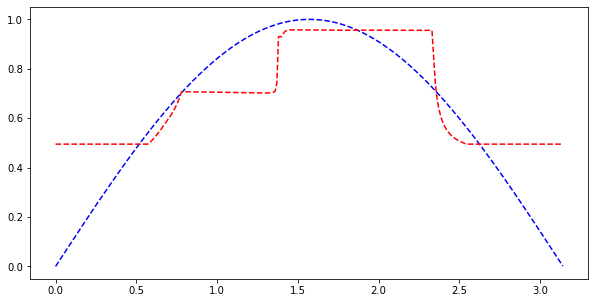

In [25]:
fig, ax0 = plt.subplots(figsize=(10, 5))

y_sin = np.sin(x_in)
ax0.plot(x_in, y_sin, 'b', linewidth=1.5, linestyle='--', )

y_f_sin = np.array([])
for i in x_in:
    #print(i, sin(result1.x, i))
    y_f_sin = np.append(y_f_sin, sin(result1.x, i))
    
ax0.plot(x_in, y_f_sin, 'r', linewidth=1.5, linestyle='--', )
plt.show()

In [26]:
def Error2(X):
    p4 = np.pi/4
    v = np.array([np.sin(0.1)-sin(X,0.1), np.sin(p4)-sin(X,p4), np.sin(2*p4)-sin(X,2*p4), np.sin(3*p4)-sin(X,3*p4), np.sin(3.1)-sin(X,3.1)])
    return np.linalg.norm(v, 2)

In [28]:

result2 = differential_evolution(Error2, bounds, constraints=cs)
result2.x, result2.fun

/home/garfield/anaconda3/lib/python3.8/site-packages/scipy/optimize/_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


AssertionError: abcd requires the four elements                                           a <= b <= c <= d.

$$
maybe
\\you'd\;better\;read\;zadeh\;inference\;system\;again
$$